In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.selfcal import generate_catalog, OffsetSys, OffsetSNR
import sqlite3
from rubin_sim.data import get_baseline

from rubin_sim.utils import healbin
import healpy as hp

In [2]:
ss = np.load('solved_stars.npz')['result']

In [3]:
sp = np.load('solved_patches.npz')['result']

In [4]:
ss['id']

array([     66,      71,      72, ..., 1337078, 1337079, 1337080])

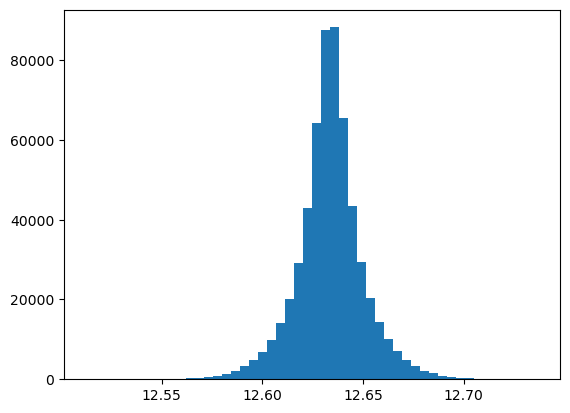

In [5]:
_temp = plt.hist(sp['zp'], bins=50)

In [12]:
filter_name = "g"
con = sqlite3.connect("msrgb_1e6.sqlite")
stars_df = pd.read_sql("select id,ra,decl,%smag from stars;" % filter_name, con)
con.close()

# what is the right way to do this? There's gotta be a better way!
names =['id', 'ra', 'decl', '%smag' % filter_name]
types = [int, float, float, float]
stars = np.empty(stars_df.shape[0], dtype=list(zip(names, types)))
for key in names:
    stars[key] = stars_df[key].values


In [13]:
stars_trimmed = stars[np.in1d(stars['id'], ss['id'])]

In [14]:
stars_trimmed

array([(     66, 129.327, -89.0203  , 17.5439),
       (     71, 138.537, -89.0784  , 17.6609),
       (     72, 141.782, -89.1034  , 17.4889), ...,
       (1337078, 337.148,  -0.788291, 17.0037),
       (1337079, 345.546,  -0.758393, 18.2861),
       (1337080, 353.166,  -0.94849 , 17.7995)],
      dtype=[('id', '<i8'), ('ra', '<f8'), ('decl', '<f8'), ('gmag', '<f8')])

In [15]:
ss

array([(     66, 4.88849632), (     71, 5.04352718),
       (     72, 4.88919692), ..., (1337078, 4.33255154),
       (1337079, 5.66009335), (1337080, 5.19174224)],
      dtype=[('id', '<i8'), ('fitMag', '<f8')])

In [18]:
resid = stars_trimmed['gmag'] - ss['fitMag']
resid = resid - np.median(resid)

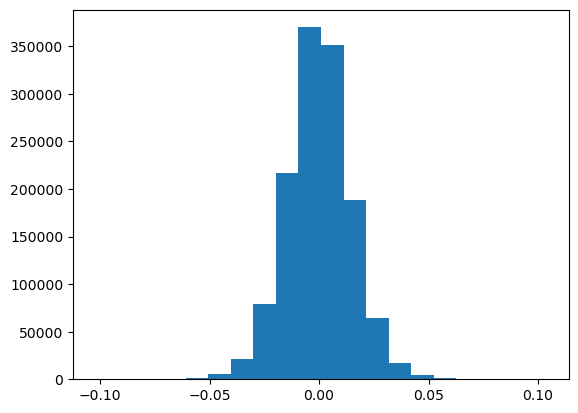

In [19]:
_temp = plt.hist(resid, bins=20)

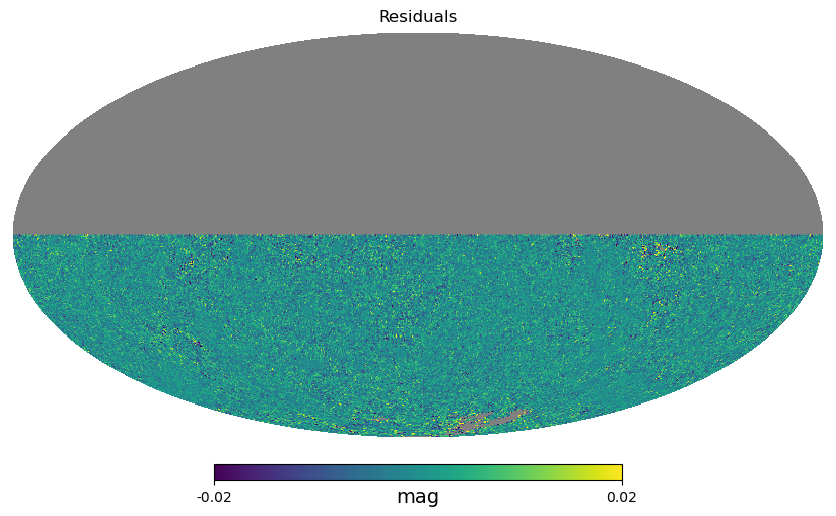

In [21]:
resid_map = healbin(stars_trimmed["ra"], stars_trimmed["decl"], resid, 128, reduce_func=np.mean)
hp.mollview(resid_map, min=-0.02, max=0.02, title='Residuals', unit='mag')

In [22]:
np.std(resid)

0.014510711808620121